# About data

<table>
    <tr>
        <th> attribute <th>
        <th> format <th>
        <th> dimension <th>
    <tr>
    <tr>
        <td> ID <td>
        <td> numeric <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Name <td>
        <td> char <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Sex <td>
        <td> char <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Height <td>
        <td> numeric <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Weight <td>
        <td> numeric <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Age <td>
        <td> numeric <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Team <td>
        <td> char <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> NOC <td>
        <td> char <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Games <td>
        <td> char <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Year <td>
        <td> numeric <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Season <td>
        <td> char <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> City <td>
        <td> char <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Sport <td>
        <td> char <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Event <td>
        <td> char <td>
        <td> ? <td>
    <tr>
    <tr>
        <td> Medal <td>
        <td> char <td>
        <td> ? <td>
    <tr>
<table>

# The course of the decision

1. translation of the original athlete_events.csv file from the format .csv to format .xlsx (either .sas)
2. checking the source data for errors (typos);
3. checking the source data for missing values ("missing");
4. checking the source data for data outliers ("outliers");
5. checking the source data for duplicate rows (observations);
6. checking the source data of explanatory variables (attributes) for multicollinearity;
7. transformation of source data into digital format ("digitalization");
8. selection of training and test samples.

# Import dependencies

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Check reading file

In [17]:
def read_csv(filepath: str):
    return pd.read_csv(filepath)

In [3]:
df = pd.read_csv("./athlete_events.csv", sep =",")
df.head()

,"ID,""Name"",""Sex"",""Age"",""Height"",""Weight"",""Team"",""NOC"",""Games"",""Year"",""Season"",""City"",""Sport"",""Event"",""Medal"";;;;;;;;;;;"
0,"1,""A Dijiang"",""M"",24,180,80,""China"",""CHN"",""199..."
1,"2,""A Lamusi"",""M"",23,170,60,""China"",""CHN"",""2012..."
2,"3,""Gunnar Nielsen Aaby"",""M"",24,NA,NA,""Denmark""..."
3,"4,""Edgar Lindenau Aabye"",""M"",34,NA,NA,""Denmark..."
4,"5,""Christine Jacoba Aaftink"",""F"",21,185,82,""Ne..."


Incorrect data file!
Check parse file in xlsx format

In [4]:
def parse_excel(filepath: str):
    dfs = []
    xlsx = pd.ExcelFile(filepath)

    for sheet in xlsx.sheet_names:
        dfs.append(xlsx.parse(sheet))
        
    return dfs

# Run func parse_excel()

In [5]:
df_list = parse_excel("./athlete_events.xlsx")
main_df = df_list[0]
main_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Get info about dataset

## Main Info

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB





## Colums Info

In [23]:
main_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

## Cheking null in data

In [31]:
main_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Checking data for errors (typos)

### Check Sex

In [13]:
main_df['Sex'].value_counts(normalize=True, dropna=False)

Sex
M    0.725129
F    0.274871
Name: proportion, dtype: float64

<Axes: xlabel='Sex'>

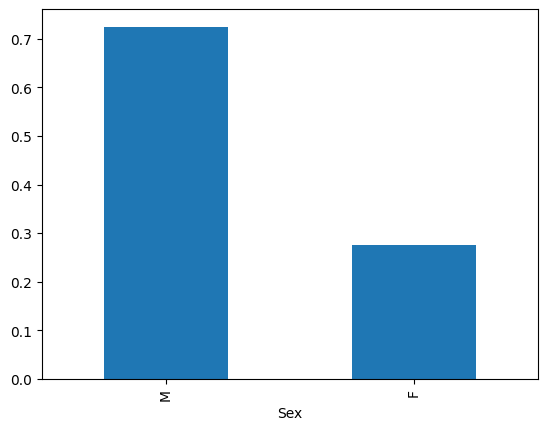

In [15]:
main_df['Sex'].value_counts(normalize=True, dropna=False).plot.bar()

### Check Age

In [10]:
main_df['Age'].value_counts(normalize=True)

Age
23.0    0.083607
24.0    0.083014
22.0    0.079551
25.0    0.075320
21.0    0.073245
          ...   
77.0    0.000008
84.0    0.000004
10.0    0.000004
96.0    0.000004
97.0    0.000004
Name: proportion, Length: 74, dtype: float64

<Axes: xlabel='Age'>

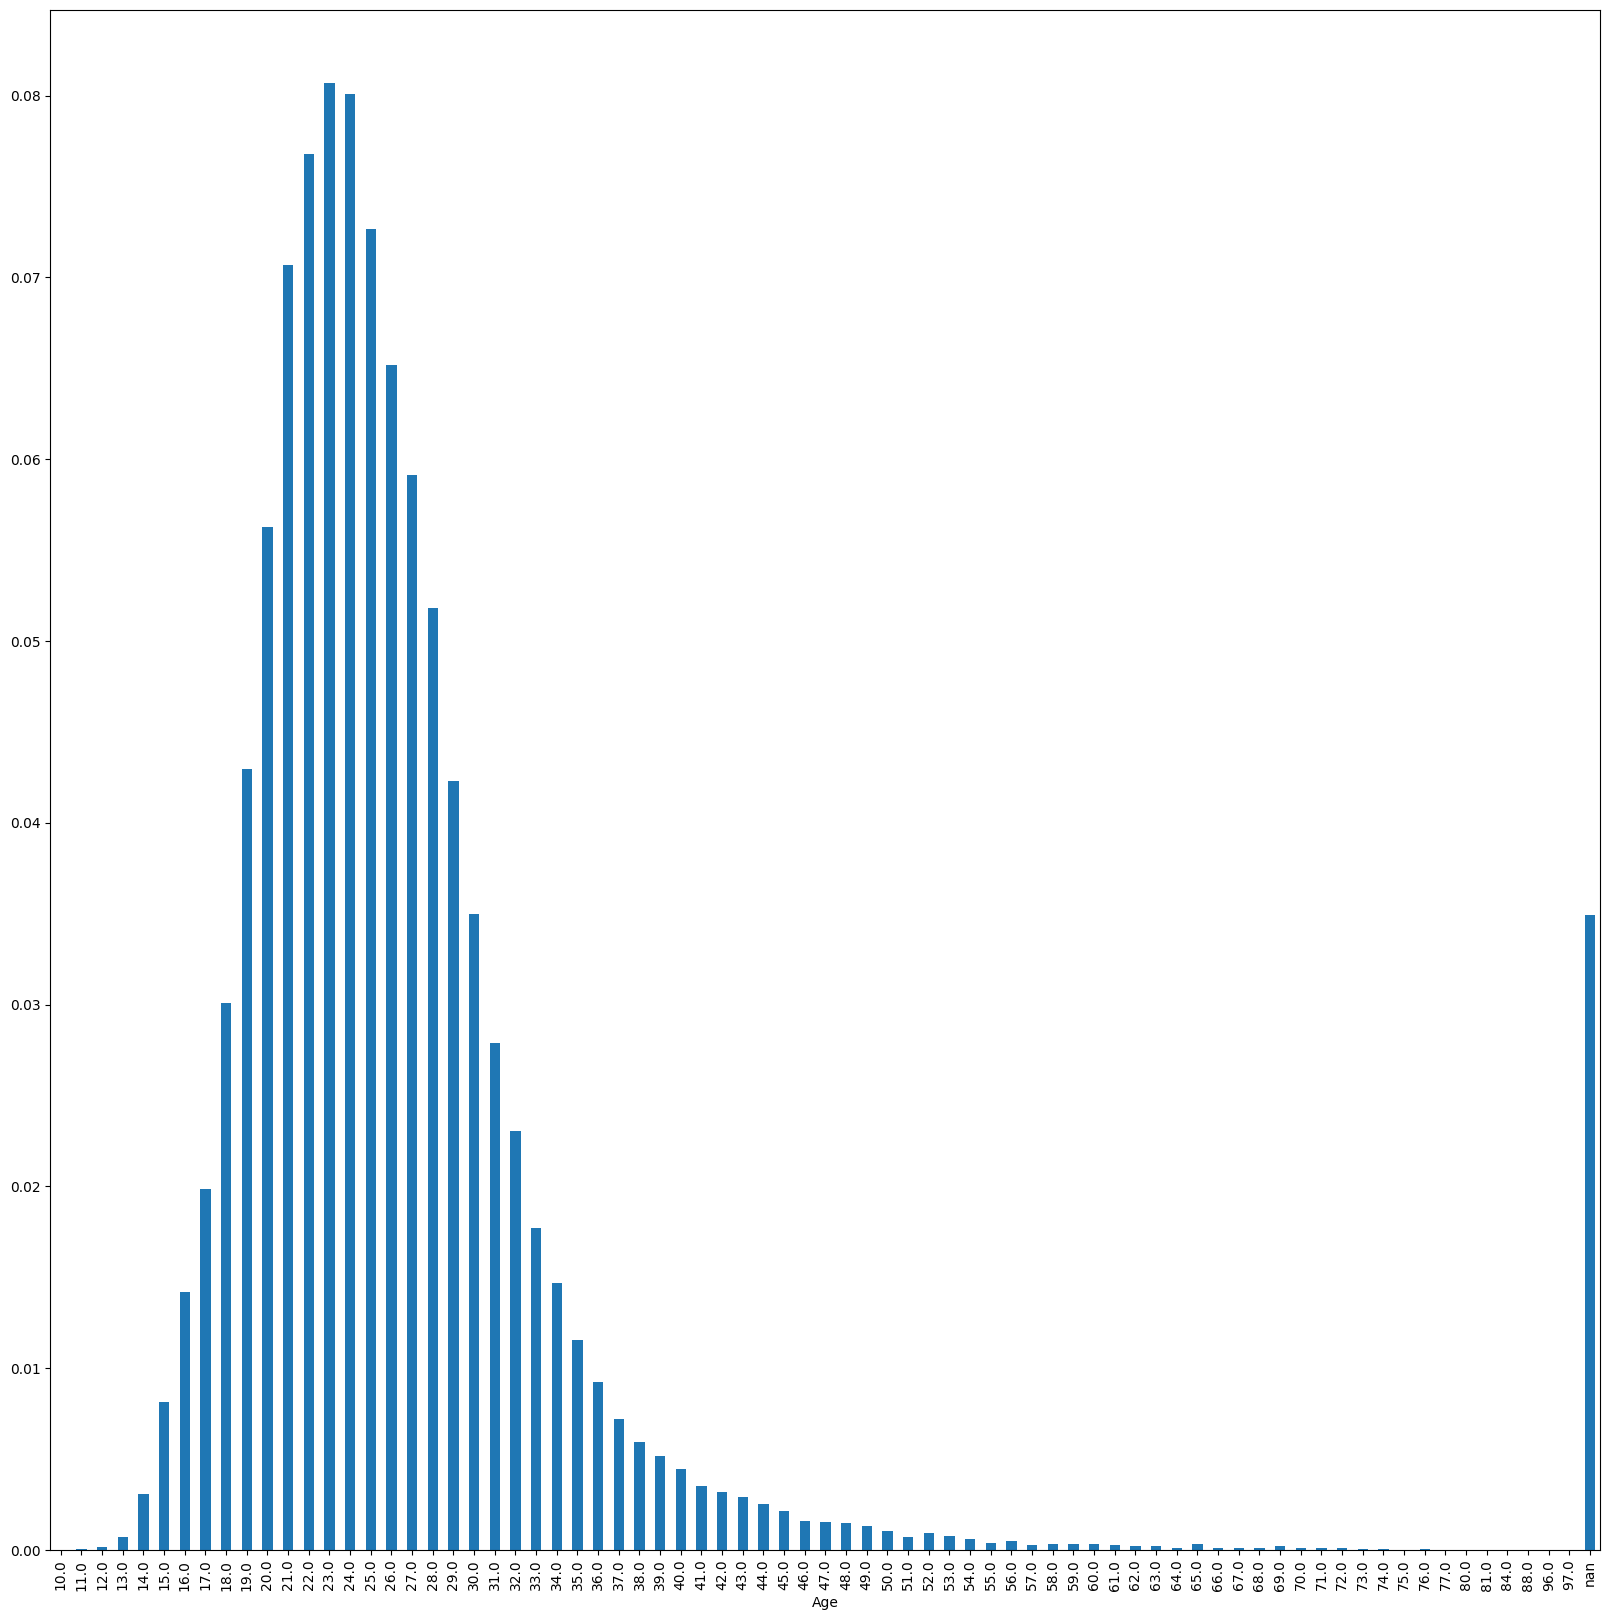

In [8]:
main_df['Age'].value_counts(normalize=True, dropna=False).sort_index().plot.bar(figsize=(20,20))

### Check Height

In [35]:
main_df['Height'].value_counts(normalize=True)

Height
180.0    0.059219
170.0    0.056773
178.0    0.050762
175.0    0.048923
183.0    0.039271
           ...   
226.0    0.000014
131.0    0.000009
130.0    0.000009
219.0    0.000009
128.0    0.000005
Name: proportion, Length: 95, dtype: float64

<Axes: xlabel='Height'>

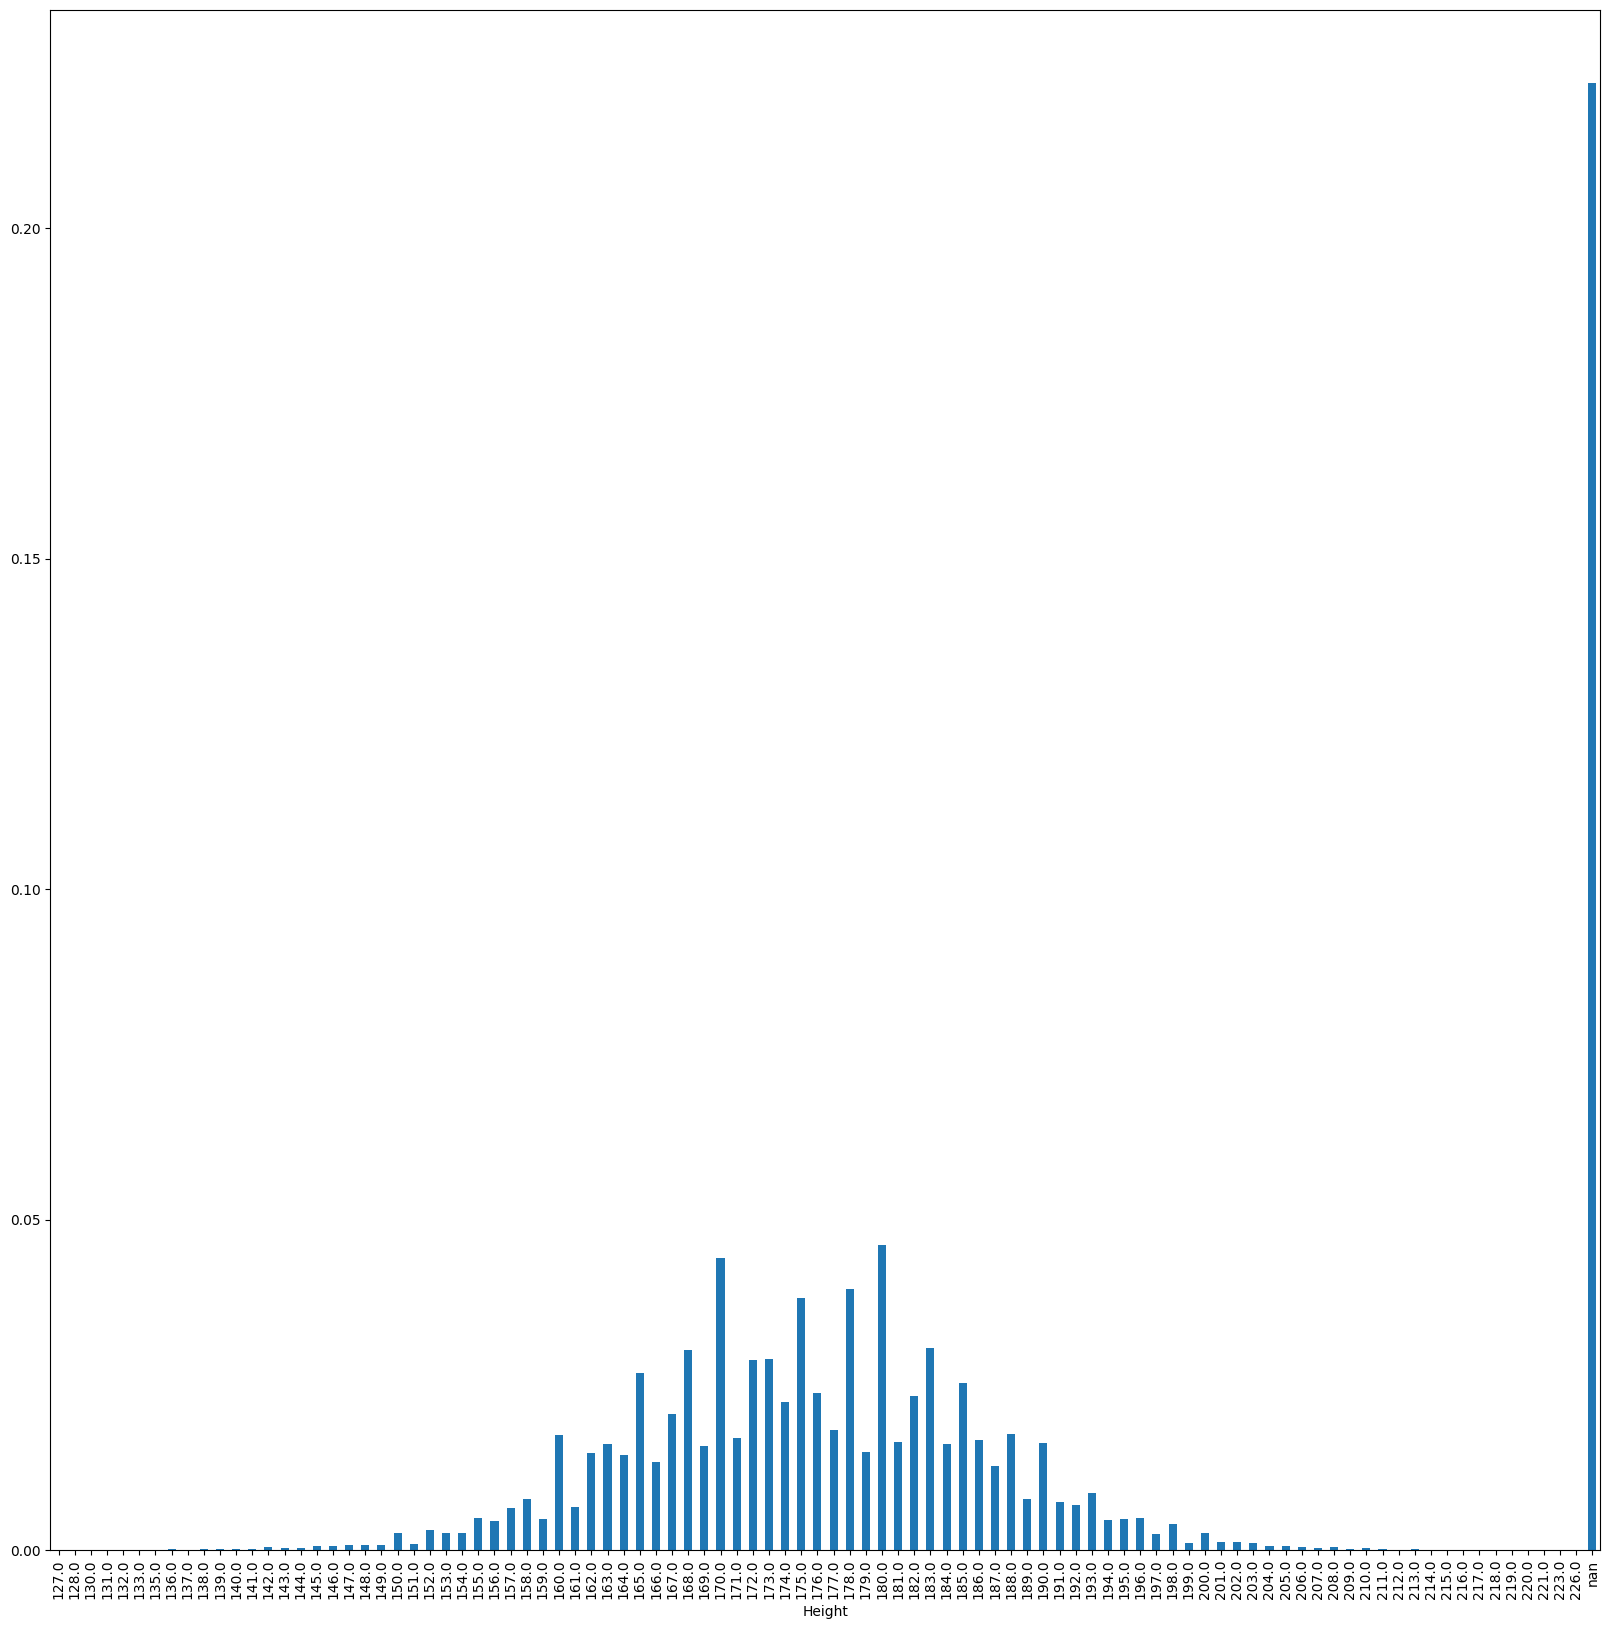

In [9]:
main_df['Height'].value_counts(normalize=True, dropna=False).sort_index().plot.bar(figsize=(20,20))

### Check Weight

In [40]:
main_df['Weight'].value_counts(ascending=False)

Weight
70.0     9625
60.0     7994
75.0     7810
68.0     7284
65.0     7236
         ... 
190.0       1
180.0       1
149.0       1
48.5        1
198.0       1
Name: count, Length: 220, dtype: int64

<Axes: xlabel='Weight'>

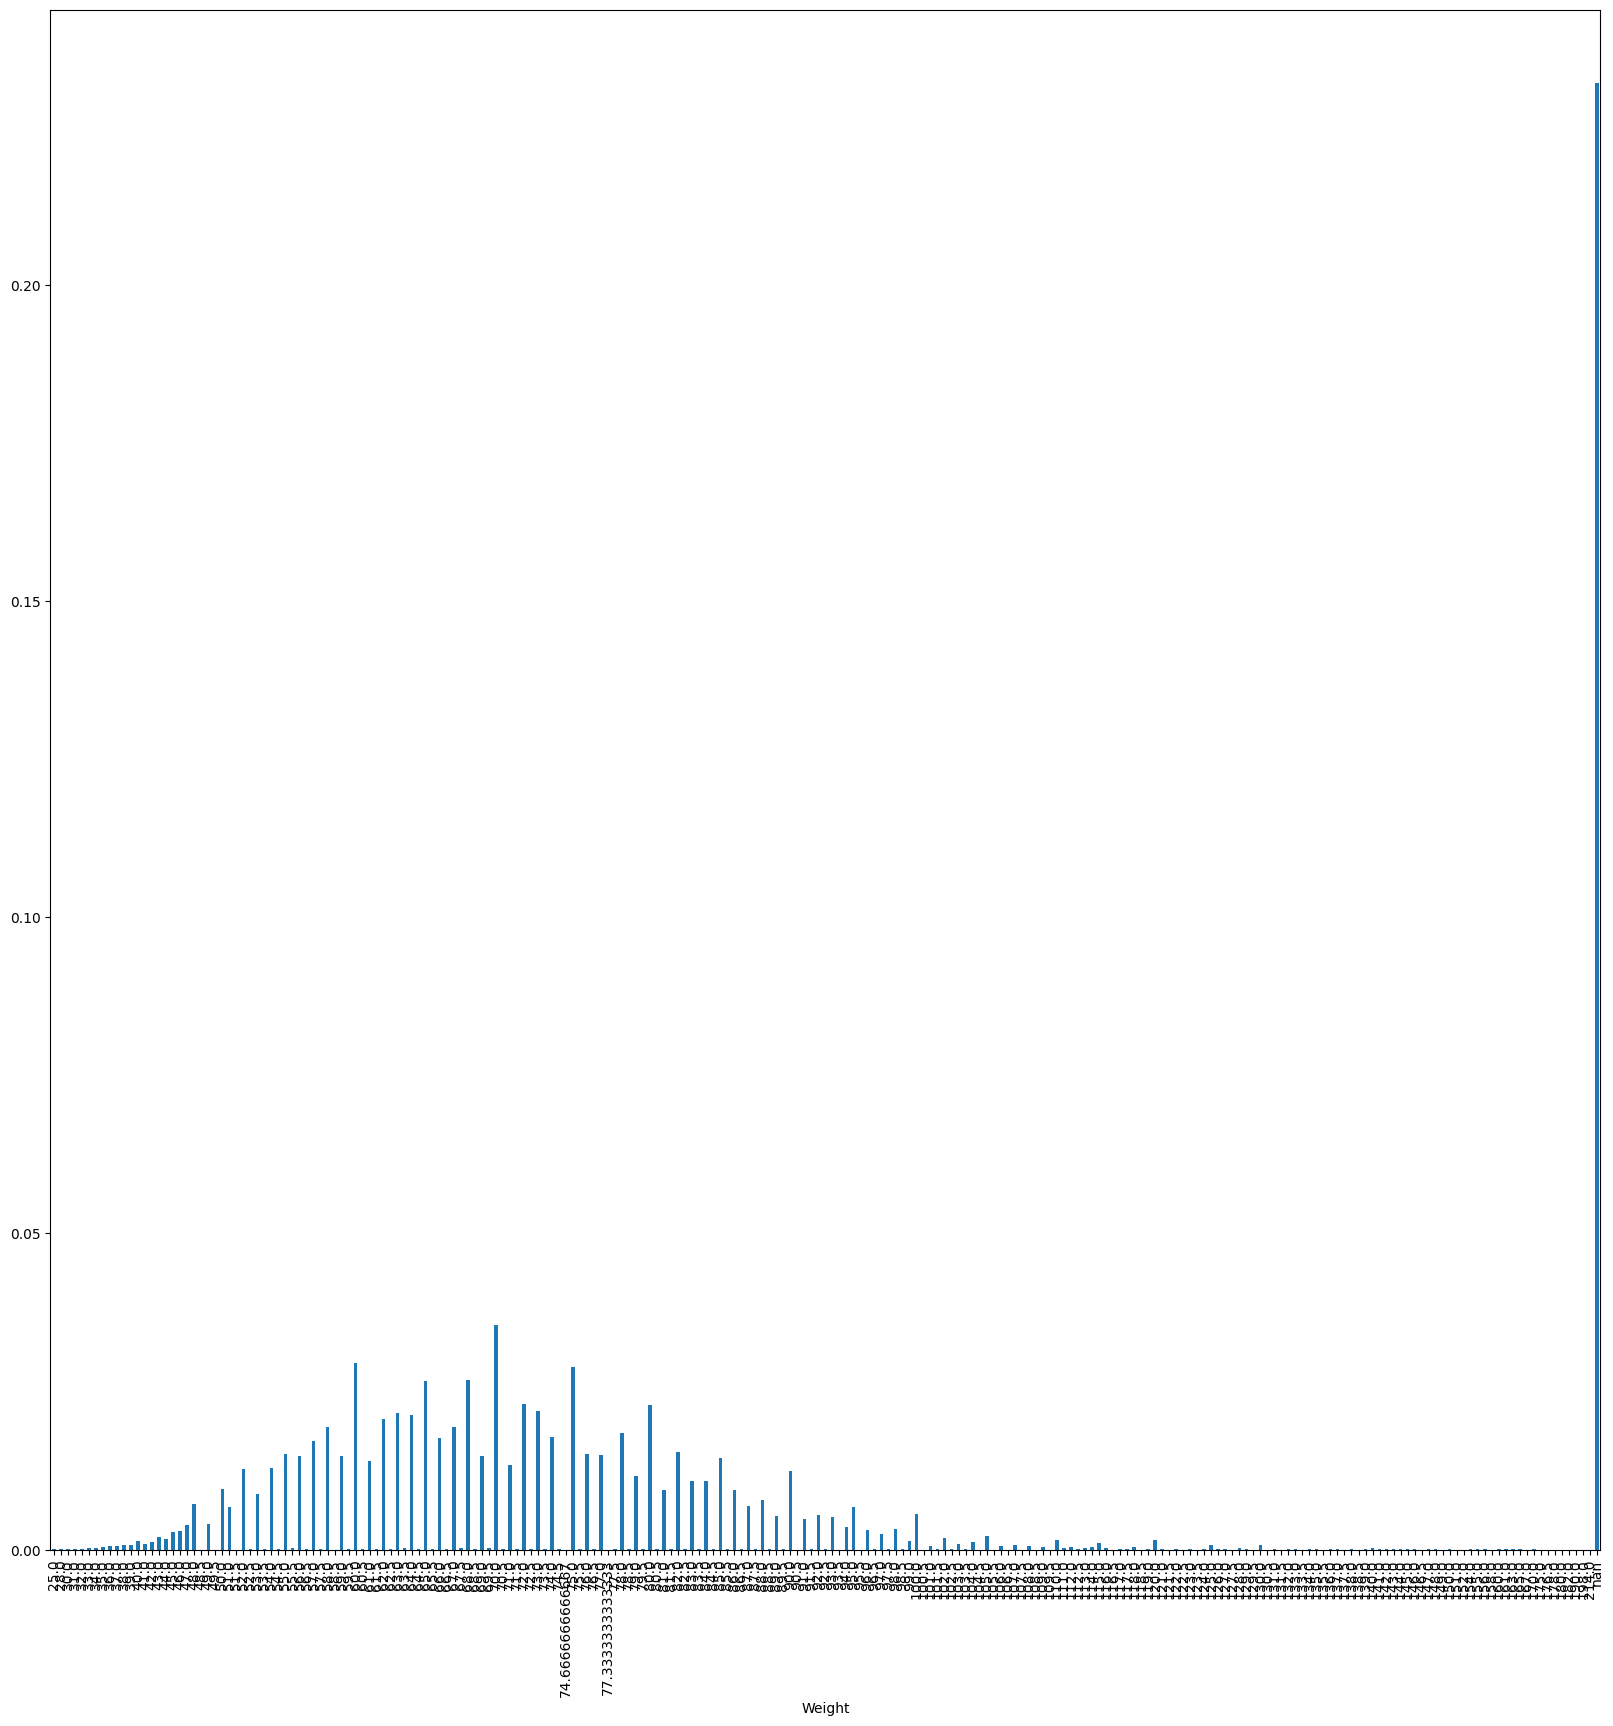

In [10]:
main_df['Weight'].value_counts(normalize=True, dropna=False).sort_index().plot.bar(figsize=(20,20))

### Check Year

In [41]:
main_df['Year'].value_counts(normalize=True)

Year
1992    0.060539
1988    0.054132
2000    0.050978
1996    0.050827
2016    0.050488
2008    0.050170
2004    0.049584
2012    0.047655
1972    0.044110
1984    0.042742
1976    0.038736
1968    0.038651
1964    0.034967
1952    0.034517
1960    0.034063
1980    0.032964
1948    0.027590
1936    0.027298
1956    0.023732
1924    0.020998
1928    0.020559
2014    0.018040
2010    0.016237
2006    0.016163
1920    0.015831
2002    0.015156
1912    0.014901
1998    0.013297
1932    0.012249
1994    0.011656
1908    0.011438
1900    0.007141
1906    0.006392
1904    0.004799
1896    0.001402
Name: proportion, dtype: float64

<Axes: xlabel='Year'>

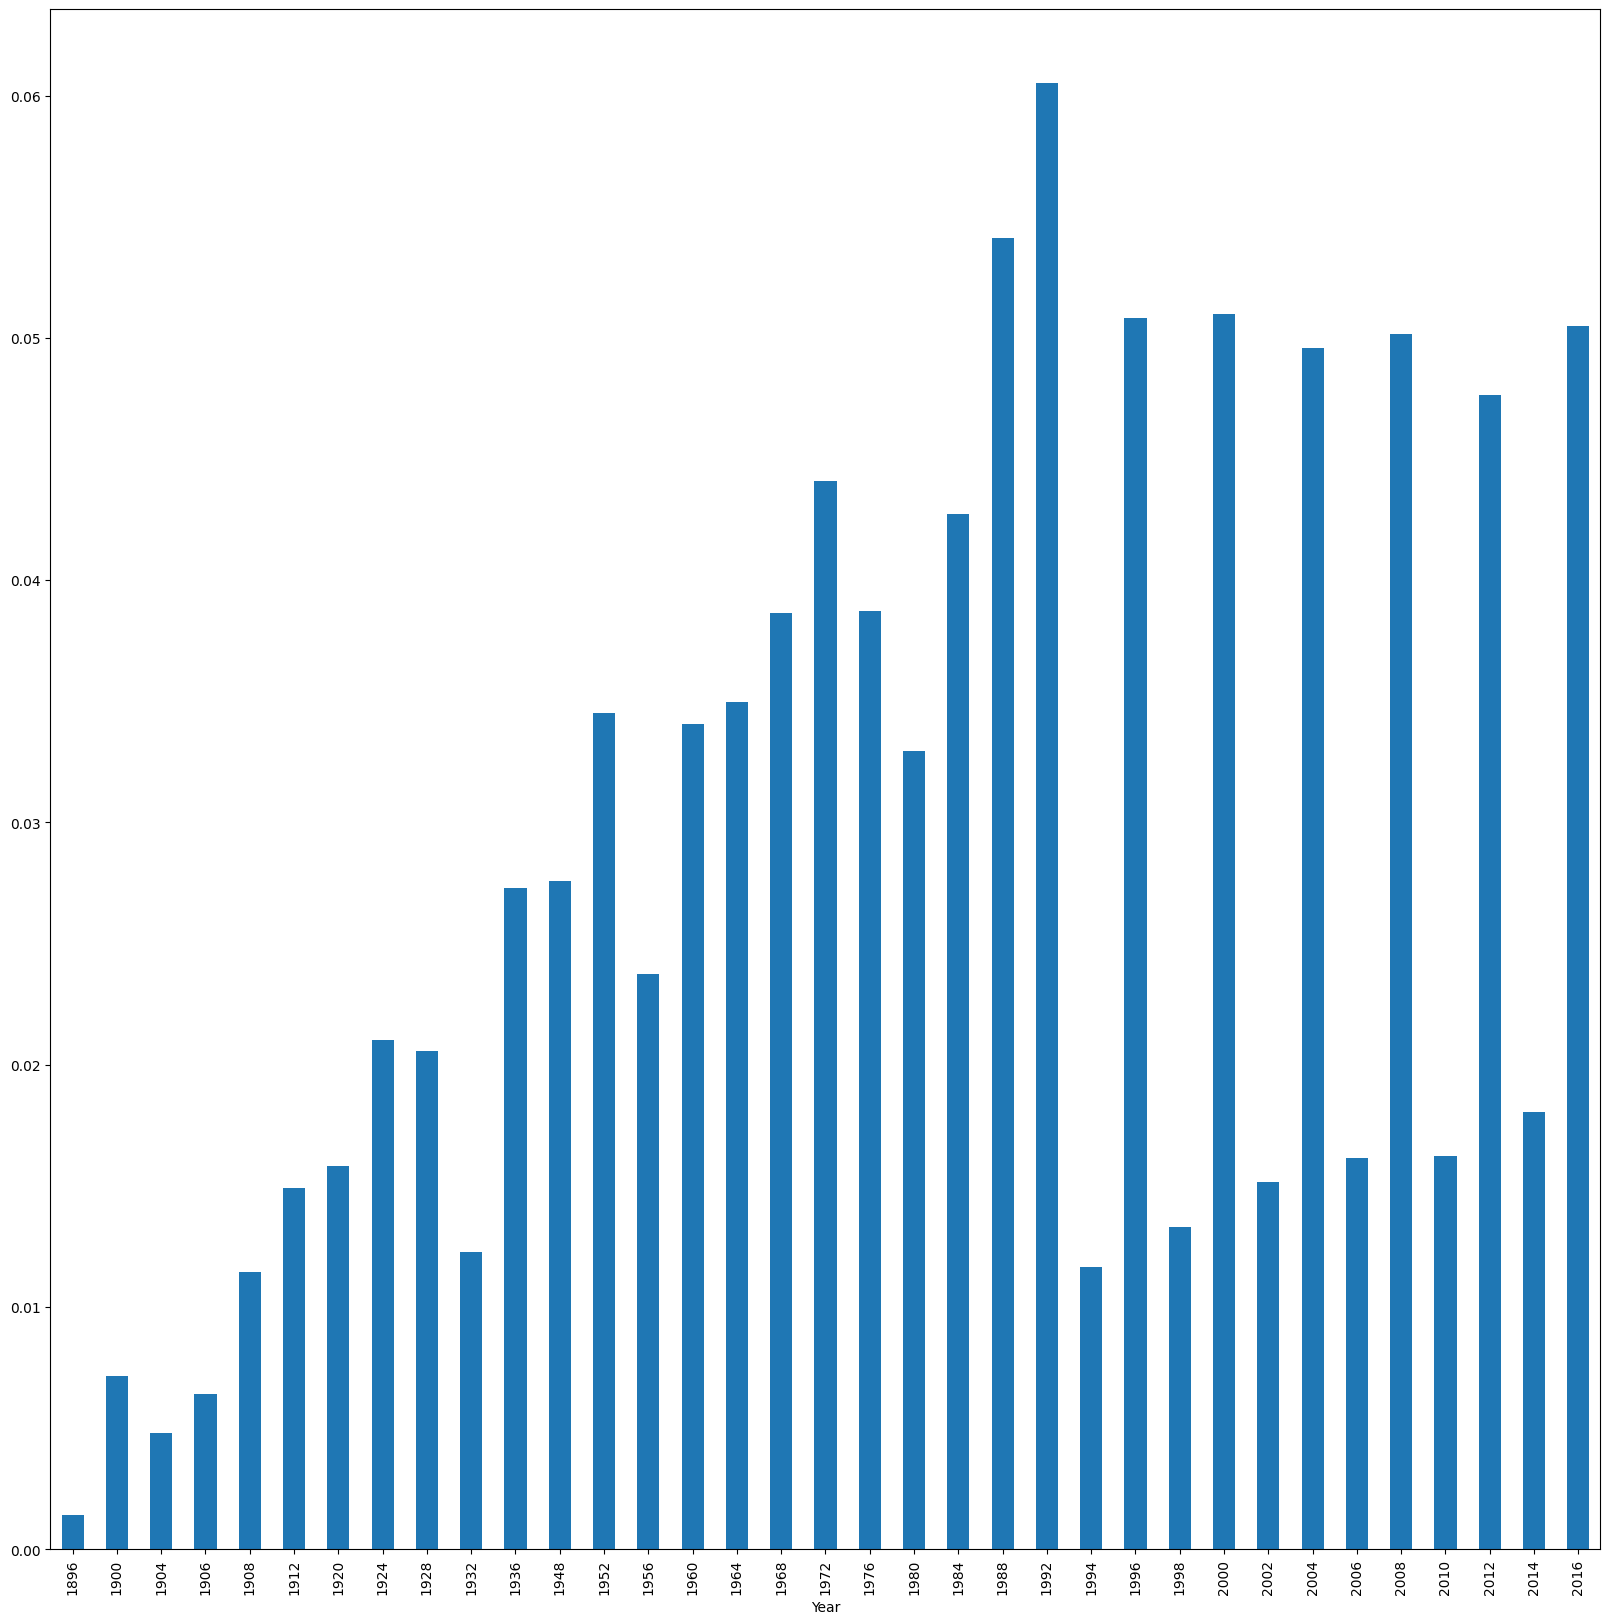

In [11]:
main_df['Year'].value_counts(normalize=True, dropna=False).sort_index().plot.bar(figsize=(20,20))

### Check Season

In [42]:
main_df['Season'].value_counts(normalize=True)

Season
Summer    0.820874
Winter    0.179126
Name: proportion, dtype: float64

<Axes: xlabel='Season'>

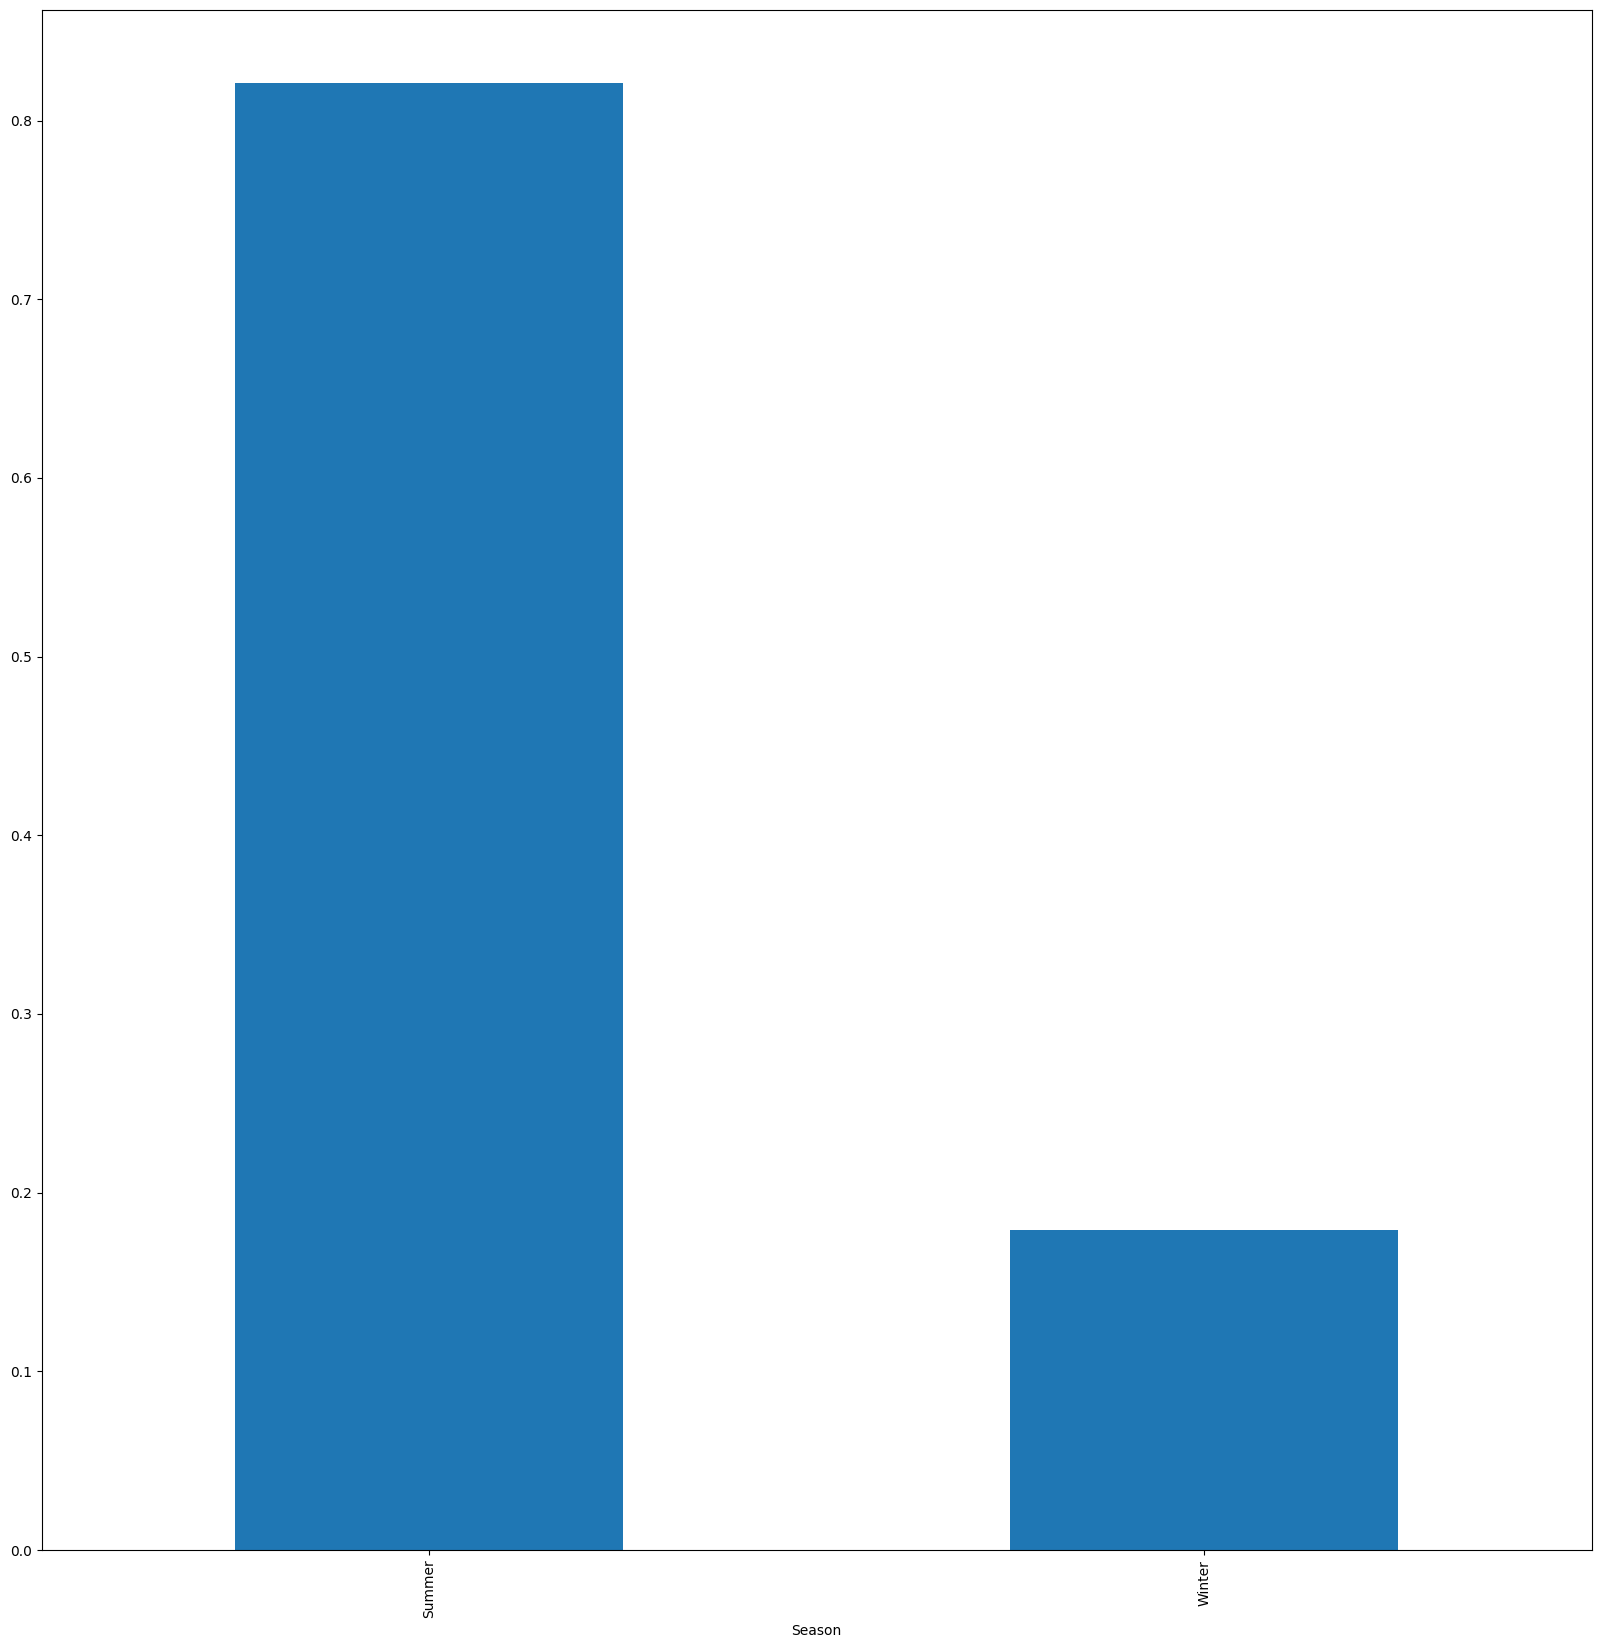

In [12]:
main_df['Season'].value_counts(normalize=True, dropna=False).sort_index().plot.bar(figsize=(20,20))

## Checking NaN in data (check missing)

In [27]:
main_df.isna().mean().sort_values(ascending=False)

Medal     0.853262
Weight    0.231912
Height    0.221938
Age       0.034944
ID        0.000000
Name      0.000000
Sex       0.000000
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
dtype: float64

In [25]:
for col in main_df.columns:
    print('Number NaN in columns %s = %d' % (col, main_df[col].isna().sum()))

Number NaN in columns ID = 0
Number NaN in columns Name = 0
Number NaN in columns Sex = 0
Number NaN in columns Age = 9474
Number NaN in columns Height = 60171
Number NaN in columns Weight = 62875
Number NaN in columns Team = 0
Number NaN in columns NOC = 0
Number NaN in columns Games = 0
Number NaN in columns Year = 0
Number NaN in columns Season = 0
Number NaN in columns City = 0
Number NaN in columns Sport = 0
Number NaN in columns Event = 0
Number NaN in columns Medal = 231333


## Checking data for outlines

# Duplicates

## Checking duplicates in dataset

In [16]:
main_df[main_df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


## Delete duplicates

In [18]:
del_dup_main_df = main_df.drop_duplicates()

In [20]:
del_dup_main_df.shape

(269731, 15)

In [21]:
main_df.shape

(271116, 15)

# Processing of empty values

## Check empty values

In [22]:
main_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

<Axes: >

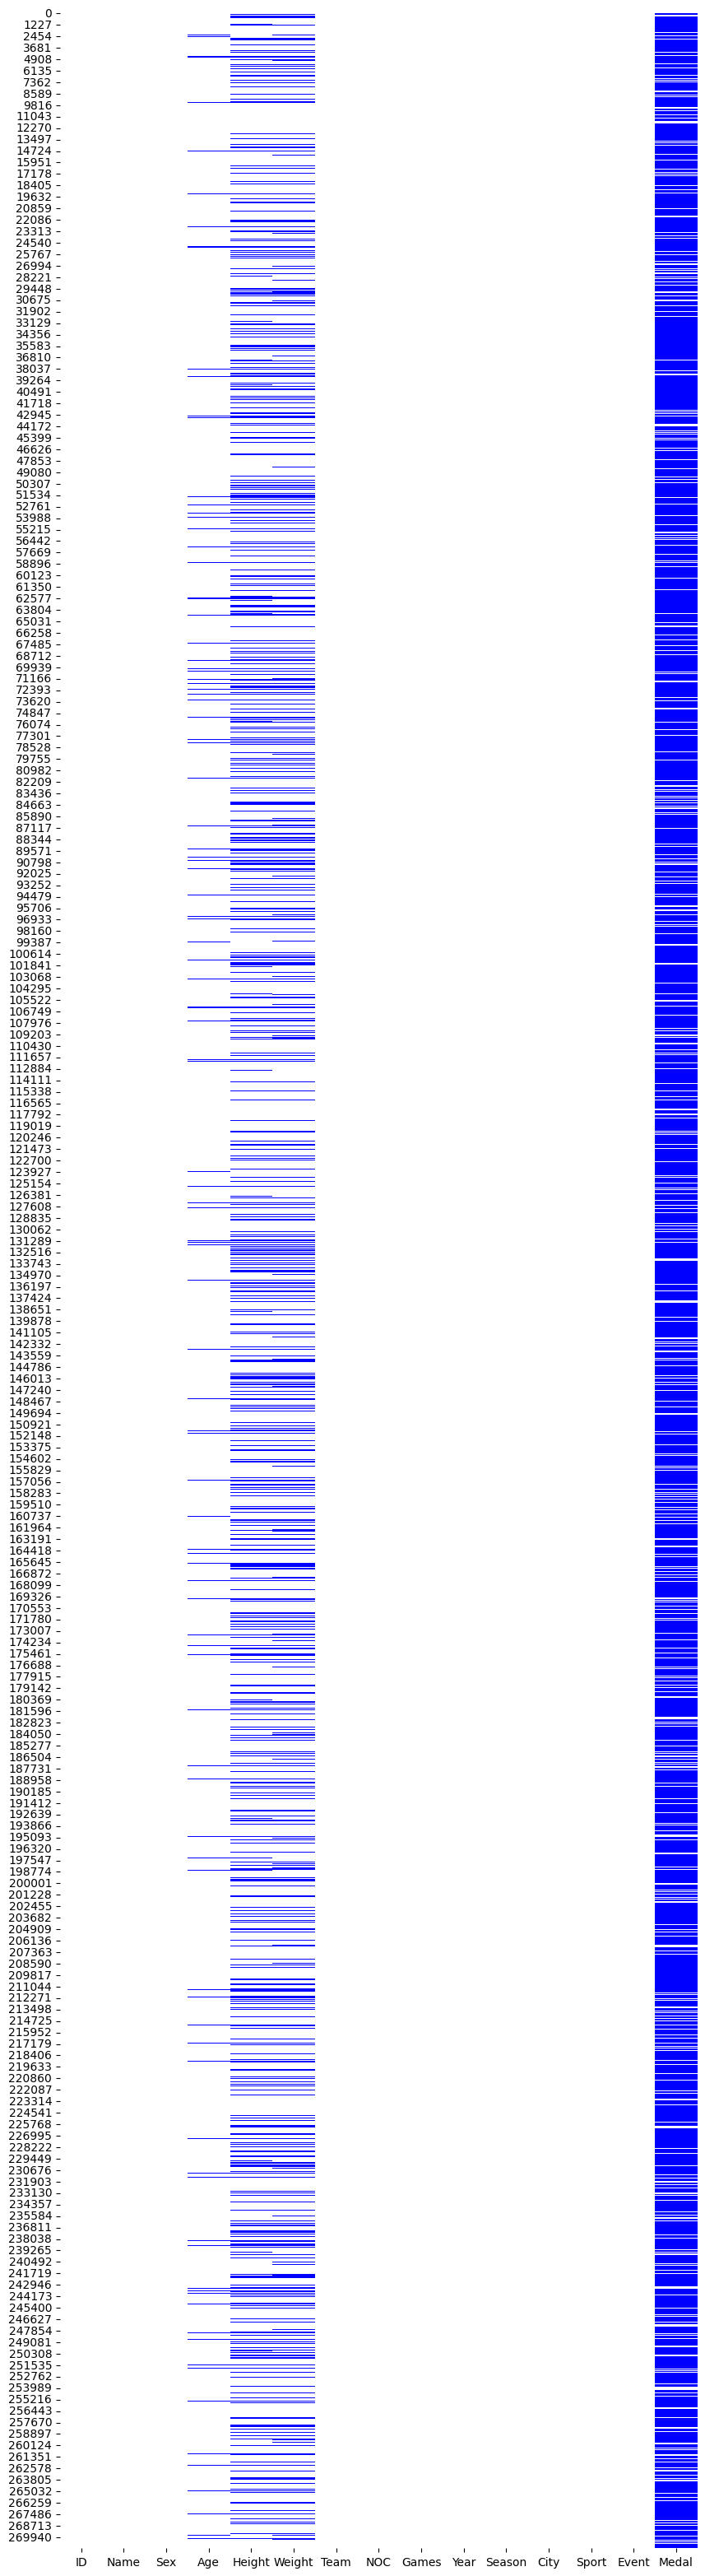

In [51]:
colors = ['white', 'blue']
fig, ax = plt.subplots(figsize=(10,40))  
sns.heatmap(main_df.isnull(), cmap=sns.color_palette(colors), cbar=False)

Most passes go through the "Medal" field. There are also gaps in the participant's height and weight fields. However, this data does not make up 50% of all fields. Therefore, the following algorithm will work:
1. If all indicators are missing (height, weight, age and medal), then the data is deleted
2. If all fields except the medal are missing, then the data remains and is filled with the value
3. Duplicate rows are deleted

## Delete rows

Delete duplicates

<Axes: >

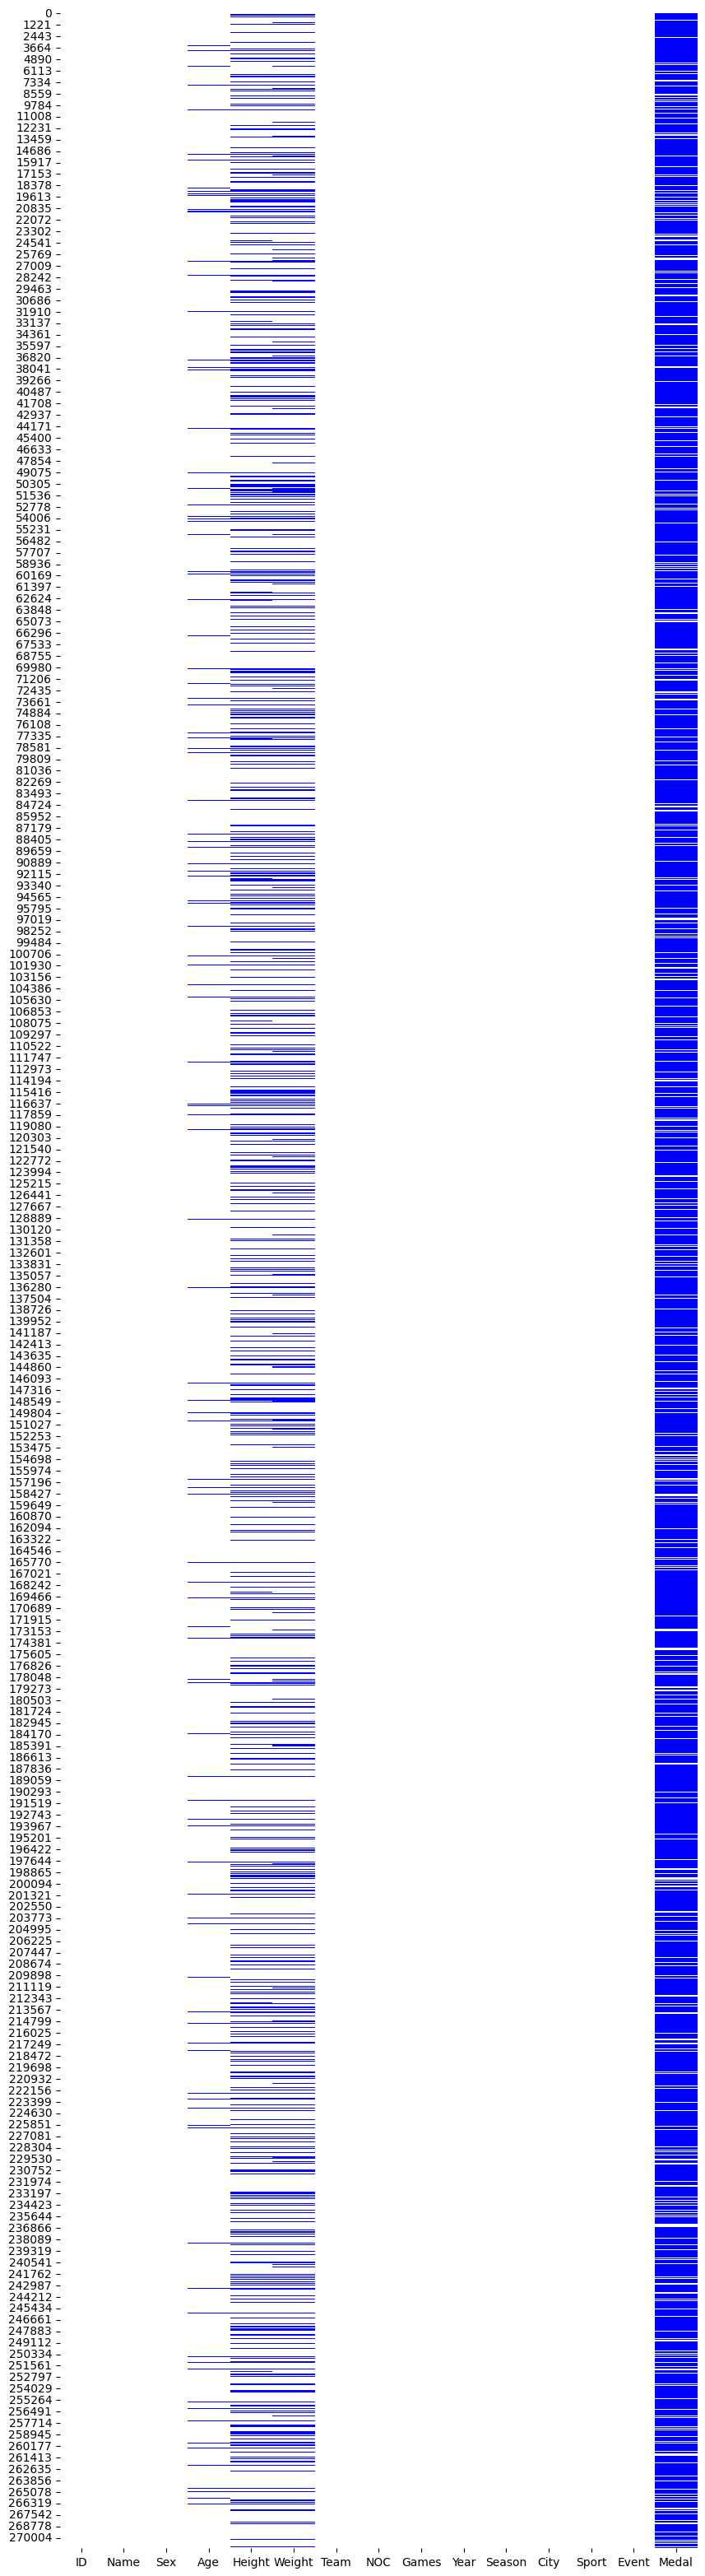

In [58]:
treat_df = main_df.drop_duplicates()
fig, ax = plt.subplots(figsize=(10,40))
sns.heatmap(treat_df.isnull(), cmap=sns.color_palette(colors), cbar=False)

In [59]:
treat_df.shape

(269731, 15)

Delete all param null

<Axes: >

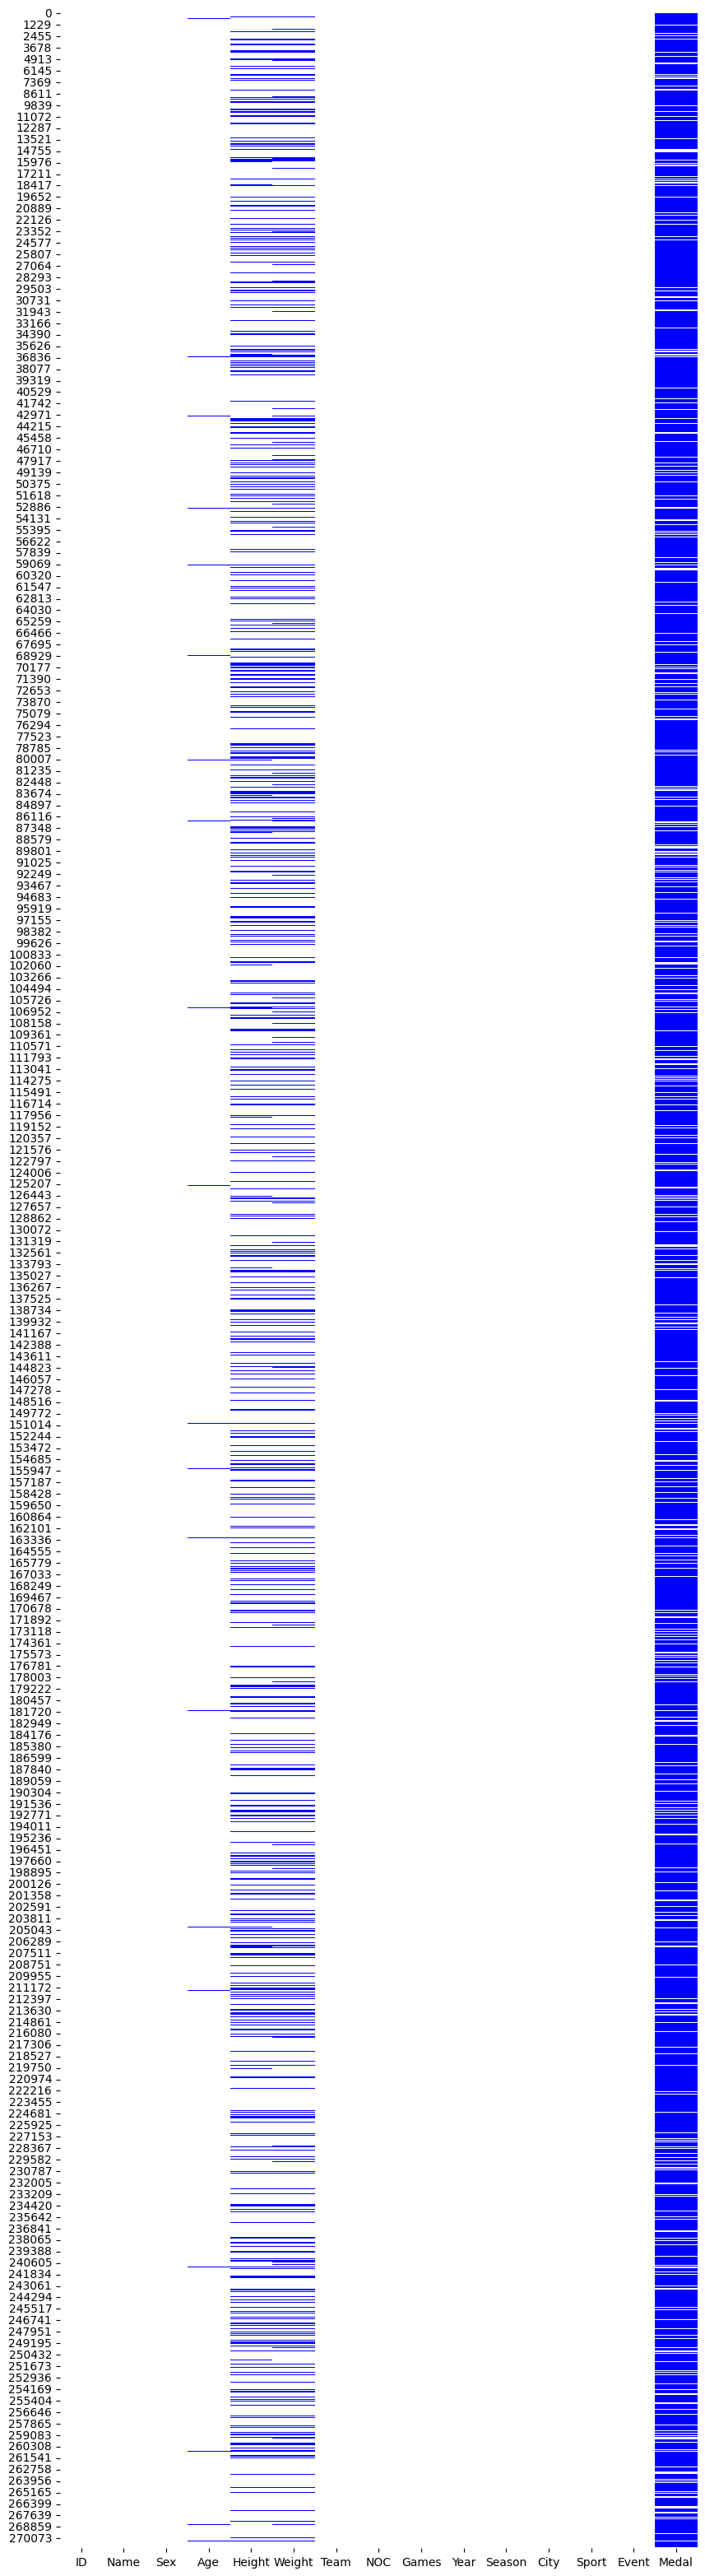

In [60]:
count_row_null = 4
treat_df = treat_df[treat_df.isnull().sum(axis=1) < count_row_null]
fig, ax = plt.subplots(figsize=(10,40))  
sns.heatmap(treat_df.isnull(), cmap=sns.color_palette(colors), cbar=False)

In [61]:
treat_df.shape

(262156, 15)